PREDICTIVE

In [7]:
#Import the necessary libraries
import pandas as pd # Loading dataset
import numpy as np #Perform numerical calculations
import matplotlib.pyplot as plt #Python visualizations
import seaborn as sns #Statistical visualizations
from scipy import stats #Statistical inferencing
from statsmodels.stats.outliers_influence import variance_inflation_factor #Checking for multicollinearity
from statsmodels.tools.tools import add_constant #Adding y-intercept to our model
from statsmodels.formula.api import ols #Linear Regression
import statsmodels.api as sm #ANOVA/ F-Statistic
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler #Preprocessing data before ML
from sklearn.model_selection import train_test_split, GridSearchCV #split our data, get the best model parameters
from sklearn.linear_model import LinearRegression, Ridge, Lasso #Linear Regression
from sklearn.tree import DecisionTreeRegressor #Tree model
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor #Ensembling model
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score #Model evaluators
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LogisticRegression

In [3]:
#IMPORT THE FILE
heart=pd.read_csv(r"C:\Users\user\Desktop\heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
y=heart["target"]
x=heart.drop(columns=["target"],axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.25, 
                                                    random_state=0)


In [8]:
logreg=LogisticRegression()

In [10]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression with no intercept and 'liblinear' solver
logreg = LogisticRegression(fit_intercept=False, solver='liblinear', random_state=0)

# Fit to training data
model_log = logreg.fit(X_train, y_train)
model_log

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [15]:
def precision(y, y_hat):
    correct_yes = 0
    total_yes = 0
    
    for actual, predicted in zip(y, y_hat):
        if predicted == 1:      # If model said "yes"
            total_yes += 1
            if actual == 1:     # And was correct
                correct_yes += 1
    
    if total_yes == 0:
        return 0
    
    return correct_yes / total_yes

In [24]:
def recall(y, y_hat):
    correct_yes = 0
    actual_yes = 0
    
    for actual, predicted in zip(y, y_hat):
        if actual == 1:
            actual_yes += 1
            if predicted == 1:
                correct_yes += 1
    
    if actual_yes == 0:
        return 0
    
    return correct_yes / actual_yes  # MAKE SURE THIS RETURN EXISTS!

In [16]:
def accuracy(y, y_hat):
    correct = 0
    total = len(y)
    
    for i in range(total):
        if y[i] == y_hat[i]:  # If prediction matches actual
            correct += 1
    
    return correct / total

In [17]:
def f1_score(y, y_hat):
    # First calculate precision and recall
    prec = precision(y, y_hat)
    rec = recall(y, y_hat)
    
    # If either is zero, F1 is zero
    if prec + rec == 0:
        return 0
    
    # Calculate F1 score
    return 2 * (prec * rec) / (prec + rec)

In [21]:
#Your code here
y_hat_train = model_log.predict(X_train)
y_hat_test = model_log.predict(X_test)


In [22]:
# Your code here
y_hat_train = model_log.predict(X_train)
y_hat_test = model_log.predict(X_test)

# Calculate metrics for training set
print("=== TRAINING SET ===")
train_precision = precision(y_train, y_hat_train)
train_recall = recall(y_train, y_hat_train)
train_accuracy = accuracy(y_train, y_hat_train)
train_f1 = f1_score(y_train, y_hat_train)

=== TRAINING SET ===


KeyError: 5

In [25]:
# Your code here
y_hat_train = model_log.predict(X_train)
y_hat_test = model_log.predict(X_test)

# Convert to numpy arrays to avoid indexing issues
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)
y_hat_train_array = np.array(y_hat_train)
y_hat_test_array = np.array(y_hat_test)

# Calculate metrics for training set
print("=== TRAINING SET ===")
train_precision = precision(y_train_array, y_hat_train_array)
train_recall = recall(y_train_array, y_hat_train_array)
train_accuracy = accuracy(y_train_array, y_hat_train_array)
train_f1 = f1_score(y_train_array, y_hat_train_array)

print(f"Precision:  {train_precision:.4f}")
print(f"Recall:     {train_recall:.4f}")
print(f"Accuracy:   {train_accuracy:.4f}")
print(f"F1-Score:   {train_f1:.4f}")

# Calculate metrics for test set
print("\n=== TEST SET ===")
test_precision = precision(y_test_array, y_hat_test_array)
test_recall = recall(y_test_array, y_hat_test_array)
test_accuracy = accuracy(y_test_array, y_hat_test_array)
test_f1 = f1_score(y_test_array, y_hat_test_array)

print(f"Precision:  {test_precision:.4f}")
print(f"Recall:     {test_recall:.4f}")
print(f"Accuracy:   {test_accuracy:.4f}")
print(f"F1-Score:   {test_f1:.4f}")

=== TRAINING SET ===
Precision:  0.8346
Recall:     0.9098
Accuracy:   0.8546
F1-Score:   0.8706

=== TEST SET ===
Precision:  0.8125
Recall:     0.9070
Accuracy:   0.8289
F1-Score:   0.8571


In [30]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import numpy as np

y_hat_train = model_log.predict(X_train)
y_hat_test = model_log.predict(X_test)

y_train_array = np.array(y_train)
y_test_array = np.array(y_test)
y_hat_train_array = np.array(y_hat_train)
y_hat_test_array = np.array(y_hat_test)

print("=== TRAINING SET ===")
print(f"Precision:  {precision_score(y_train_array, y_hat_train_array):.4f}")
print(f"Recall:     {recall_score(y_train_array, y_hat_train_array):.4f}")
print(f"Accuracy:   {accuracy_score(y_train_array, y_hat_train_array):.4f}")
print(f"F1-Score:   {f1_score(y_train_array, y_hat_train_array):.4f}")

print("\n=== TEST SET ===")
print(f"Precision:  {precision_score(y_test_array, y_hat_test_array):.4f}")
print(f"Recall:     {recall_score(y_test_array, y_hat_test_array):.4f}")
print(f"Accuracy:   {accuracy_score(y_test_array, y_hat_test_array):.4f}")
print(f"F1-Score:   {f1_score(y_test_array, y_hat_test_array):.4f}")

=== TRAINING SET ===
Precision:  0.8346
Recall:     0.9098
Accuracy:   0.8546
F1-Score:   0.8706

=== TEST SET ===
Precision:  0.8125
Recall:     0.9070
Accuracy:   0.8289
F1-Score:   0.8571


In [39]:
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= i/100) # replace the "None" here
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = model_log.predict(X_test)
    y_hat_train = model_log.predict(X_train)
    
    # Calculate metrics for training set
    training_precision.append(precision_score(y_train, y_hat_train))
    training_recall.append(recall_score(y_train, y_hat_train))
    training_accuracy.append(accuracy_score(y_train, y_hat_train))
    training_f1.append(f1_score(y_train, y_hat_train))
    
    # Calculate metrics for test set
    testing_precision.append(precision_score(y_test, y_hat_test))
    testing_recall.append(recall_score(y_test, y_hat_test))
    testing_accuracy.append(accuracy_score(y_test, y_hat_test))
    testing_f1.append(f1_score(y_test, y_hat_test))

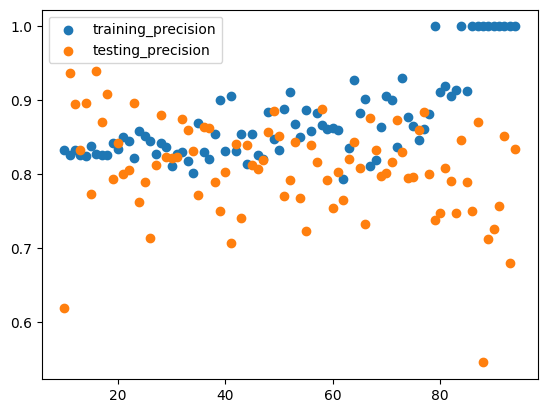

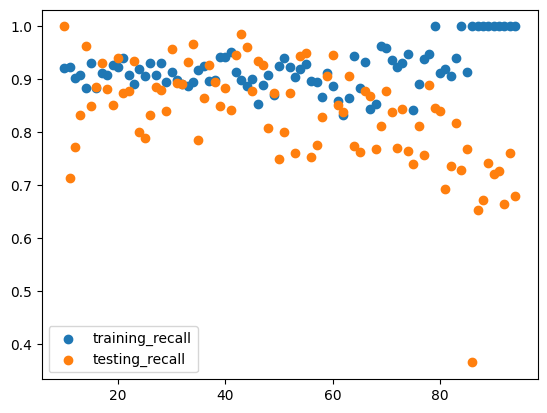

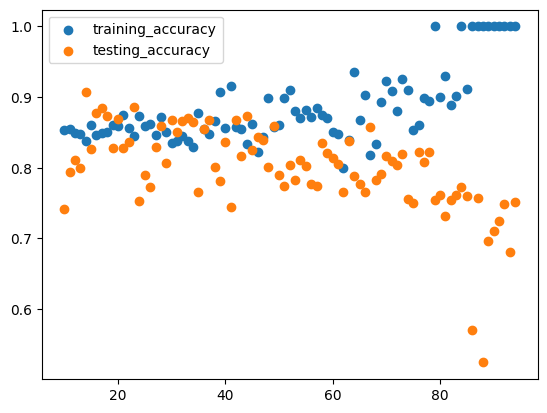

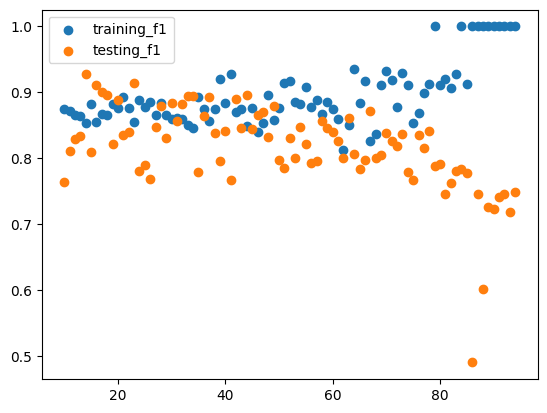

In [42]:
plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
plt.legend()
plt.show()

plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
plt.legend()
plt.show()

plt.scatter(list(range(10, 95)), training_accuracy, label='training_accuracy')
plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_accuracy')
plt.legend()
plt.show()

plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
plt.legend()
plt.show()